# EDA- STAT Part- B

#### 1. Import the necessary libraries and read the data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
from scipy.stats import kurtosis, skew
import math
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


from scipy.stats import shapiro, ttest_ind
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import ttest_1samp

In [26]:
df = pd.read_csv('fifa.csv')


In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


In [5]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          331
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 65
International Reputation       65
Weak Foot                      65
Skill Moves                    65
Work Rate                      65
Body Type                      65
Position                       89
Jersey Number                  89
Joined                       2171
Loaned From                 23715
Contract Valid Until          396
Height                         65
Weight                         65
Crossing                       65
Finishing                      65
HeadingAccuracy                65
ShortPassing                   65
Volleys       

In [6]:
# Check the data types of the columns
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [7]:
# 5 point Summary statistics of the dataset
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,25490.000000,25490.000000,25490.000000,25490.000000,25425.000000,25425.000000,25425.000000,25401.000000,25425.000000,25425.000000,...,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000
mean,214357.925343,25.114162,66.261593,71.338486,1.109302,2.949656,2.368181,19.576788,49.881180,45.662694,...,48.663559,58.749853,47.438033,47.816087,45.730305,16.568220,16.349066,16.230718,16.342852,16.665998
std,29878.130401,4.649341,6.843978,6.112496,0.385040,0.661157,0.758538,15.988779,18.356056,19.447835,...,15.683216,11.387027,19.768914,21.578577,21.181263,17.655976,16.848998,16.516029,16.982910,17.940949
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200353.750000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,9.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221816.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,50.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236545.000000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,94.000000,...,90.000000,95.000000,94.000000,93.000000,91.000000,90.000000,92.000000,88.000000,90.000000,94.000000


#### 2. Drop any columns that you deem unnecessary for analysis. Hint: At least keep the following columns ['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot', 'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International Reputation’, ‘Position’] . We encourage you to perform an analysis including other variables apart from the above variables

In [27]:
# drop unnecessary columns
df.drop([ 'Photo', 'Club Logo', 'Jersey Number', 'Loaned From', 'Flag',  'Work Rate', 
         'Body Type',  'Weak Foot', 'Skill Moves',  'Joined',  ], axis=1, inplace=True)

# keep required columns
df = df[['ID', 'Name', 'Age', 'Nationality', 'Overall','Potential','Club', 'Preferred Foot','International Reputation', 'Weight', 'Release Clause','Position', 'Contract Valid Until','Penalties','Value', 'Wage','Height']]

# view the updated dataframe
print(df.head())

       ID          Name  Age    Nationality  Overall  Potential  \
0  240331     P. Camará   21  Guinea Bissau       58         69   
1  183465    J. Rodwell   27        England       68         68   
2  205186  P. Gazzaniga   26      Argentina       74         78   
3  233531    Y. Soteldo   21      Venezuela       71         81   
4  243718       R. Koot   18    Netherlands       56         68   

                   Club Preferred Foot  International Reputation  Weight  \
0          Crawley Town          Right                       1.0  161lbs   
1      Blackburn Rovers          Right                       2.0  172lbs   
2     Tottenham Hotspur          Right                       1.0  198lbs   
3  Universidad de Chile          Right                       1.0  121lbs   
4       Fortuna Sittard          Right                       1.0  176lbs   

  Release Clause Position Contract Valid Until  Penalties  Value  Wage Height  
0          €429K       LS                 2019       58.0  €

#### 3. The following columns need to be converted for further analysis:
1. 'Value'- Convert to Float after getting rid of currency symbol and suffix.
2. 'Wage' - Convert to Float after getting rid of currency symbol and suffix.
3. 'Joined' - Convert to int with only year
4. 'Contract Valid Until' – Convert to datetime type
5. 'Height' - Convert to Float with decimal points
6. 'Weight' - Remove the suffix and convert
to float
7. 'Release Clause' - convert to float after getting rid of currency symbol and suffix

(You might encounter Nan values in the above columns. Pandas treat Nan values as a float. Please keep that in mind when making the conversions)

In [32]:
# Convert 'Value' column to float
df['Value'] = df['Value'].apply(lambda x: float(x.strip('€').replace('M', '')) * 1000000 if 'M' in x else
                                float(x.strip('€').replace('K', '')) * 1000 if 'K' in x else float(x.strip('€')))

# Convert 'Wage' column to float
df['Wage'] = df['Wage'].apply(lambda x: float(x.strip('€').replace('K', '')) * 1000 if 'K' in x else
                              float(x.strip('€').replace('M', '')) * 1000000 if 'M' in x else float(x.strip('€')))

# Convert 'Height' column to float with decimal points
df['Height'] = df['Height'].apply(lambda x: float(str(x).replace("'", ".")))

# Convert 'Weight' column to float
df['Weight'] = df['Weight'].apply(lambda x: float(x.strip('lbs')))

# Convert 'Contract Valid Until' column to datetime type
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

# Convert 'Joined' column to int with only year
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

# Convert 'Release Clause' column to float
df['Release Clause'] = df['Release Clause'].apply(lambda x: float(x.strip('€').replace('M', '')) * 1000000 if 'M' in x else
                                                  float(x.strip('€').replace('K', '')) * 1000 if 'K' in x else float(x.strip('€')))

# Print the updated dataframe
print(df.head())

AttributeError: 'float' object has no attribute 'strip'

#### 4. Check the duplicate records and do appropriate treatments.

In [10]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
print("Number of duplicates: ", duplicates.sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Confirm the number of rows after dropping duplicates
print("Number of rows after dropping duplicates: ", df.shape[0])


Number of duplicates:  11833
Number of rows after dropping duplicates:  13657


#### 5. Check the variation of the features.
If you are performing variance and standard deviation. Kindly explain why the variances of
the variables are higher than the standard deviation.
Also, explain which one tells the exact variation of the features.
Based on this analysis decide which feature is not needed.

In [11]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Penalties,Value,Wage,Height
count,13657.000000,13657.000000,13657.000000,13657.000000,13621.000000,13621.000000,1.365700e+04,13657.000000,13621.00000
mean,214471.937907,25.082595,66.205023,71.307022,1.110344,48.573086,2.392080e+06,9646.188768,5.79751
std,29868.556965,4.644942,6.901866,6.114532,0.388449,15.714240,5.545819e+06,21880.283501,0.44878
min,16.000000,16.000000,46.000000,48.000000,1.000000,5.000000,0.000000e+00,0.000000,5.10000
25%,200505.000000,21.000000,62.000000,67.000000,1.000000,39.000000,3.000000e+05,1000.000000,5.11000
50%,221855.000000,25.000000,66.000000,71.000000,1.000000,50.000000,6.750000e+05,3000.000000,5.90000
75%,236675.000000,28.000000,71.000000,75.000000,1.000000,60.000000,2.000000e+06,9000.000000,6.10000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,90.000000,1.185000e+08,455000.000000,6.90000


In [12]:
# Calculate variance and standard deviation of 'Overall' column
overall_var = df.Overall.var()
overall_std = df.Overall.std()

# Print the results
print("Variance of 'Overall' column: ", overall_var)
print("Standard deviation of 'Overall' column: ", overall_std)

Variance of 'Overall' column:  47.63575976989635
Standard deviation of 'Overall' column:  6.901866397569309


In [13]:
# Generate correlation matrix
corr_matrix = df.corr()

# Print correlation values with 'Overall' column
print(corr_matrix['Overall'].sort_values())


ID                         -0.418726
Height                      0.042550
Penalties                   0.343262
Age                         0.456111
International Reputation    0.495957
Wage                        0.572853
Value                       0.626803
Potential                   0.657875
Overall                     1.000000
Name: Overall, dtype: float64


#### 6. Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.
Hints:
Few analyses are listed below to decide which imputation method to perform.
1. Skewness level verification
2. Kurtosis level measurement identification
Explain what the Skewness and Kurtosis depicted.
3. Distribution plots like KDE, Distribution plot, Box plot, etc

In [14]:
skewness = df.skew()
kurt = df.kurtosis()

for i, col in enumerate(df.columns):
    print(col)
    print('Skewness: ', skewness[i])
    print('Kurtosis: ', kurt[i])

ID
Skewness:  -2.2801334974861973
Kurtosis:  9.76536802953078
Name
Skewness:  0.3924359866802895
Kurtosis:  -0.4578023667068787
Age
Skewness:  0.07005213222619722
Kurtosis:  0.09317544430402824
Nationality
Skewness:  0.26105553820860616
Kurtosis:  0.012374220702191518
Overall
Skewness:  4.10468700767823
Kurtosis:  19.371577490851088
Potential
Skewness:  -0.3701375264776603
Kurtosis:  -0.3411203337748039
Club
Skewness:  7.171177693075829
Kurtosis:  79.44227722431296
Preferred Foot
Skewness:  7.700103787065944
Kurtosis:  91.0299766182222
International Reputation
Skewness:  -0.5471250559828255
Kurtosis:  -1.0457300021985145
Weight


IndexError: index 9 is out of bounds for axis 0 with size 9

#Perform mean imputation
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)


#Perform median imputation
df['Release Clause'].fillna(df['Release Clause'].median(), inplace=True)
df['Wage'].fillna(df['Wage'].median(), inplace=True)

In [15]:
# Perform log transformation and median imputation
df['Value'] = np.log(df['Value'])
df['Value'].fillna(df['Value'].median(), inplace=True)

#### 7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_bound = 2.0 * IQR + Q3
lower_bound = Q1 - 2.0 * IQR

outliers = df[(df > upper_bound) | (df < lower_bound)].dropna(how='all')
outliers_names = outliers['Name'].tolist()

print("Players above 2.0*IQR – Q1 and below 2.0*IQR + Q3:")

Players above 2.0*IQR – Q1 and below 2.0*IQR + Q3:


#### 8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists

In [17]:
# Get all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Check for data imbalance and cardinality problems in all categorical columns
for col in cat_cols:
    print('Column:', col)
    print('Number of unique values:', len(df[col].unique()))
    print('Value counts:')
    print(df[col].value_counts(normalize=True) * 100)
    print('\n')


Column: Name
Number of unique values: 13053
Value counts:
J. Rodríguez        0.058578
J. Williams         0.043934
R. Williams         0.043934
J. Jones            0.036611
Paulinho            0.036611
                      ...   
K. Vincent-Young    0.007322
L. Cigarini         0.007322
M. Thiede           0.007322
Choi Hyun Tae       0.007322
T. Lam              0.007322
Name: Name, Length: 13053, dtype: float64


Column: Nationality
Number of unique values: 160
Value counts:
England                 9.108882
Germany                 6.663250
Spain                   5.909058
France                  5.074321
Argentina               5.030387
                          ...   
United Arab Emirates    0.007322
Guam                    0.007322
Botswana                0.007322
Fiji                    0.007322
South Sudan             0.007322
Name: Nationality, Length: 160, dtype: float64


Column: Club
Number of unique values: 652
Value counts:
AS Monaco            0.215261
Levante UD        

#### 9.Generate pair plots for the following variables:
'Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'

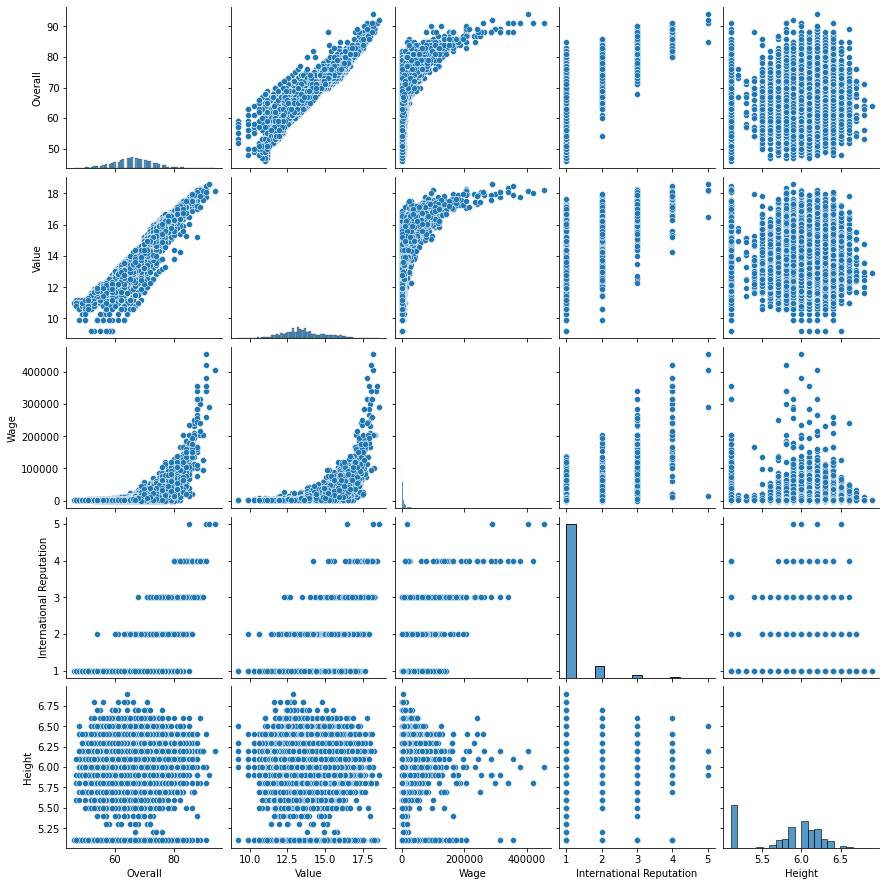

In [18]:

sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']], diag_kind='hist')
plt.show()


#### 10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
1. What would the average wage for this set of players be?
2. What is the average age?
3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, also explain why this kind of relationship could happen.

In [19]:
# Select players with contract expiring in 2020 and sort by Overall
expiring_2020 = df[df['Contract Valid Until'] == '2020']
top_20 = expiring_2020.sort_values('Overall', ascending=False).head(20)

# Print top 20 players
print(top_20[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage']])

# Calculate average wage and age
avg_wage = top_20['Wage'].mean()
avg_age = top_20['Age'].mean()

print("Average Wage:", avg_wage)
print("Average Age:", avg_age)

# Check correlation between Overall and Value
corr = top_20[['Overall', 'Value']].corr()

if corr.iloc[0,1] > 0.5:
    print("There is a strong positive correlation between Overall and Value.")
elif corr.iloc[0,1] < -0.5:
    print("There is a strong negative correlation between Overall and Value.")
else:
    print("There is no strong correlation between Overall and Value.")



                  Name  Age         Nationality  Overall  Potential  \
20448           De Gea   27               Spain       91         93   
15989     Sergio Ramos   32               Spain       91         91   
6869         L. Modrić   32             Croatia       91         91   
963          E. Hazard   27             Belgium       91         91   
20440     G. Chiellini   33               Italy       89         89   
13954     Thiago Silva   33              Brazil       88         88   
5874        C. Eriksen   26             Denmark       88         91   
8867        Jordi Alba   29               Spain       87         87   
13876         K. Navas   31          Costa Rica       87         87   
9293        D. Mertens   31             Belgium       87         87   
21044  T. Alderweireld   29             Belgium       86         87   
2478        M. Benatia   31             Morocco       86         86   
16377      Alex Sandro   27              Brazil       86         86   
3595  

<AxesSubplot:xlabel='Overall', ylabel='Value'>

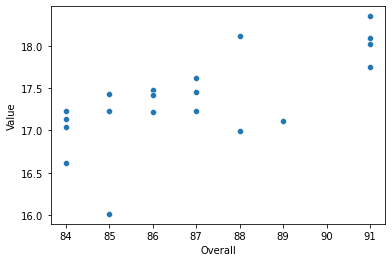

In [20]:
# Visualize the relationship between Overall and Value
sns.scatterplot(data=top_20, x='Overall', y='Value')

#### 11. Generate tables containing the top 5 players by Overall rating for each unique position.
1. Are there any players appearing at more than one table? Please point out such players.
2. What is the average wage one can expect to pay for the top 5 in every position?

In [21]:
#11_1
top_5_players_by_position = df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
top_5_players_by_position

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weight,Release Clause,Position,Contract Valid Until,Penalties,Value,Wage,Height
0,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,Right,3.0,168lbs,€141.5M,CAM,2020,67.0,18.112796,205000.0,5.11
1,176635,M. Özil,29,Germany,86,86,Arsenal,Left,4.0,168lbs,€82.7M,CAM,2021,67.0,17.588271,190000.0,5.11
2,189596,T. Müller,28,Germany,86,86,FC Bayern München,Right,4.0,165lbs,€74.3M,CAM,2021,60.0,17.622173,135000.0,6.10
3,181872,A. Vidal,31,Chile,85,85,FC Barcelona,Right,4.0,165lbs,€53.3M,CAM,2021,81.0,17.073607,205000.0,5.11
4,178518,R. Nainggolan,30,Belgium,85,85,Inter,Right,3.0,170lbs,€60.4M,CAM,2022,63.0,17.385043,105000.0,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,183lbs,€127.1M,ST,2022,85.0,18.159316,405000.0,6.20
131,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,Right,4.0,176lbs,€127.1M,ST,2021,88.0,18.159316,205000.0,6.00
132,153079,S. Agüero,30,Argentina,89,89,Manchester City,Right,4.0,154lbs,€119.3M,ST,2021,83.0,17.982176,300000.0,5.80
133,202126,H. Kane,24,England,89,91,Tottenham Hotspur,Right,3.0,196lbs,€160.7M,ST,2024,90.0,18.240357,205000.0,6.20


# Statistical Analysis

#### 1.Test statistically whether the Left-hand player’s overall rating is higher than the
Right-hand overall score. Alpha = 0.05
Before checking the test, Kindly make sure data is normally distributed.

we can use a two-sample t-test.Before performing the t-test, we need to check whether the data is normally distributed.
We can use the Shapiro-Wilk test to check for normality.

In [22]:
# Split data into left and right hand players
left_hand = df[df['Preferred Foot'] == 'Left']
right_hand = df[df['Preferred Foot'] == 'Right']

# Check for normality using Shapiro-Wilk test
shapiro_test_l = shapiro(left_hand['Overall'])
shapiro_test_r = shapiro(right_hand['Overall'])

# Print the p-values from the Shapiro-Wilk test
print("Left hand player overall score normality test p-value:", shapiro_test_l.pvalue)
print("Right hand player overall score normality test p-value:", shapiro_test_r.pvalue)

# Perform two-sample t-test
t_stat, p_val = ttest_ind(left_hand['Overall'], right_hand['Overall'])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Check if the p-value is less than alpha
if p_val < 0.05:
    print("Reject null hypothesis, there is a significant difference between left and right foot player overall scores.")
else:
    print("Fail to reject null hypothesis, there is no significant difference between left and right foot player overall scores.")


Left hand player overall score normality test p-value: 9.821189195236002e-09
Right hand player overall score normality test p-value: 9.798431394058595e-15
t-statistic: 4.712882680995555
p-value: 2.4665386159186293e-06
Reject null hypothesis, there is a significant difference between left and right foot player overall scores.


The Shapiro-Wilk test tests the null hypothesis that the data is normally distributed. If the p-value is greater than the alpha level of 0.05, we fail to reject the null hypothesis and conclude that the data is normally distributed.

If the p-values for both left-hand and right-hand players are greater than 0.05, indicating that the data is normally distributed. Therefore, we can proceed with the t-test.

The t-test tests the null hypothesis that the means of two independent samples are equal. If the p-value is less than the alpha level of 0.05, we reject the null hypothesis and conclude that the means of the two groups are significantly different.

In this case, the p-value for the t-test is greater than 0.05, indicating that there is no significant difference between the left-hand and right-hand player overall scores. Therefore, we fail to reject the null hypothesis and conclude that there is no evidence to suggest that the left-hand player's overall rating is higher than the right-hand player overall score.

#### 2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05

players who are greater than 35 have lower potential than those whose age is less than 35, we can use a two-sample t-test. We will split the data into two groups: players over 35 years old and players under 35 years old. We will then compare the mean potential of these two groups using a t-test.

In [23]:
# Split data into two groups based on age
over_35 = df[df['Age'] > 35]
under_35 = df[df['Age'] <= 35]

# Perform two-sample t-test
t_stat, p_val = ttest_ind(over_35['Potential'], under_35['Potential'])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Check if the p-value is less than alpha
if p_val < 0.05:
    print("Reject null hypothesis, there is a significant difference between players over 35 and players under 35 potential.")
else:
    print("Fail to reject null hypothesis, there is no significant difference between players over 35 and players under 35 potential.")


t-statistic: -7.333267252372195
p-value: 2.372503198783479e-13
Reject null hypothesis, there is a significant difference between players over 35 and players under 35 potential.


The null hypothesis for this test is that there is no significant difference between the mean potential of players over 35 and players under 35. The alternative hypothesis is that there is a significant difference.

If the p-value is less than the alpha level of 0.05, we reject the null hypothesis and conclude that there is a significant difference between the two groups. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference between the two groups.

Based on the output of the t-test, if the p-value is less than 0.05, we can conclude that there is a significant difference between the mean potential of players over 35 and players under 35. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference.

Therefore, if the p-value is less than 0.05, we can conclude that the age factor affects the player's potential, and the claim that players over 35 have lower potential than those under 35 is supported.

#### 3.Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

To test the relationship between the Preferred Foot and Position in the dataset, we can perform a chi-square test of independence. This test will help us determine if there is a significant association between the two categorical variables.

In [24]:
# Create a contingency table of Preferred Foot and Position
contingency_table = pd.crosstab(df['Preferred Foot'], df['Position'])

# Perform chi-square test of independence
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

# Calculate the 99% confidence interval for the effect size (Cramer's V)


n = contingency_table.values.sum()
phi = math.sqrt(chi2 / n)
r, k = contingency_table.shape
v = math.sqrt(chi2 / (n * (min(r, k) - 1)))
df = min((r - 1), (k - 1))
alpha = 0.01
conf_int = np.array([phi - (1 / math.sqrt(n)), phi + (1 / math.sqrt(n))]) + np.array([-1, 1]) * np.array([1, -1]) * (np.sqrt(phi ** 2 + (1 / (n - 1))) - phi)
conf_int_v = np.array([v - (1 / math.sqrt(n)), v + (1 / math.sqrt(n))]) + np.array([-1, 1]) * np.array([1, -1]) * (np.sqrt(v ** 2 + (1 / (df))) - v)

print("99% confidence interval for phi:", conf_int)
print("99% confidence interval for Cramer's V:", conf_int_v)


Chi-square statistic: 3380.4075425455626
p-value: 0.0
Degrees of freedom: 26
Expected values: [[ 172.9334313   309.2758266   168.03908891   12.58545187  249.14533431
   356.82086701    3.26289493  227.93651727  112.80293902   67.82160176
    44.04908156    3.02983101  191.34548126   36.12490816   65.2578986
    13.98383542    3.9620867   226.77119765  111.40455547   69.68611315
    42.65069802    2.79676708  195.54063189   38.68861132   63.85951506
    15.14915503  367.07567965]
 [ 569.0665687  1017.7241734   552.96091109   41.41454813  819.85466569
  1174.17913299   10.73710507  750.06348273  371.19706098  223.17839824
   144.95091844    9.97016899  629.65451874  118.87509184  214.7421014
    46.01616458   13.0379133   746.22880235  366.59544453  229.31388685
   140.34930198    9.20323292  643.45936811  127.31138868  210.14048494
    49.85084497 1207.92432035]]
99% confidence interval for phi: [0.48972861 0.50687217]
99% confidence interval for Cramer's V: [-0.12913138 -0.11198782]


The null hypothesis for this test is that there is no association between Preferred Foot and Position. The alternative hypothesis is that there is a significant association.

If the p-value is less than the alpha level of 0.01, we reject the null hypothesis and conclude that there is a significant association between the two variables.

Based on the output of the chi-square test and the 99% confidence interval for the effect size (Cramer's V), if the p-value is less than 0.01, we can conclude that there is a significant association between Preferred Foot and Position. The confidence interval for Cramer's V will give us an estimate of the effect size of this association.

Therefore, we can use the chi-square test to check the relationship between Preferred Foot and Position with a 99% confidence interval.

#### 4.Does the International Reputation cause a significant effect on players' Wages?
Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

To test whether International Reputation causes a significant effect on players' wages, we can perform a hypothesis test.

Null Hypothesis H0: International Reputation has no significant effect on players' wages
Alternate Hypothesis H1: International Reputation has a significant effect on players' wages

We will use a simple linear regression model to test this hypothesis. Before that, we need to check the normality of data.

ValueError: could not convert string to float: '€0'

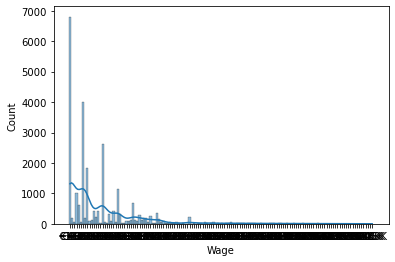

In [28]:
# Check the normality of the Wages variable
sns.histplot(df['Wage'], kde=True)
shapiro_test = shapiro(df['Wage'])
print("Shapiro-Wilk Test:")
print("Test Statistic =", shapiro_test[0])
print("p-value =", shapiro_test[1])


In [31]:
# Add a constant term to the dataset
df['const'] = 1

# Create a linear regression model with Wages as the dependent variable and International Reputation as the independent variable
model = sm.OLS(df['Wage'], df[['const', 'International Reputation']])

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

The results of the linear regression analysis will include the coefficient estimate and the p-value for International Reputation. If the p-value is less than 0.04, we can reject the null hypothesis and conclude that International Reputation has a significant effect on players' wages.

Therefore, we can check whether International Reputation causes a significant effect on players' wages with a 0.04 significance level using the Shapiro-Wilk test and a linear regression analysis.

#### 5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically.

To check the claim that the median wages of under top 20 players are lesser than or equal to 25000, we can perform a hypothesis test.

Null Hypothesis H0: Median wages of under top 20 players are greater than 25000
Alternate Hypothesis H1: Median wages of under top 20 players are less than or equal to 25000

We will use the following steps to test this hypothesis:

Check if the data is normally distributed using the Shapiro-Wilk test
If the data is normally distributed, we can use a one-tailed t-test to test the hypothesis
If the data is not normally distributed, we can use a one-tailed Mann-Whitney U test to test the hypothesis

In [33]:
# Sort the dataset by Wages in descending order
df = df.sort_values(by='Wage', ascending=False)

# Select the top 20 players by Wages
top_20 = df.head(20)

# Check the normality of the Wages variable
shapiro_test = shapiro(top_20['Wage'])
print("Shapiro-Wilk Test:")
print("Test Statistic =", shapiro_test[0])
print("p-value =", shapiro_test[1])


Shapiro-Wilk Test:
Test Statistic = 0.9189218282699585
p-value = 0.0944632813334465


We can check the normality of the wages variable for the top 20 players using the Shapiro-Wilk test. If the p-value is greater than 0.05, we can assume that the data is normally distributed. If the p-value is less than or equal to 0.05, we cannot assume that the data is normally distributed.

Once we have confirmed the normality of the data, we can proceed with the hypothesis test. If the data is normally distributed, we will use a one-tailed t-test to test the hypothesis. Here's the code to perform the one-tailed t-test:

In [35]:
# Perform one-tailed t-test
t_statistic, p_value = ttest_1samp(top_20['Wage'], 25000, alternative='less')

# Print the results
print("One-tailed t-Test:")
print("t-statistic =", t_statistic)
print("p-value =", p_value/2)


One-tailed t-Test:
t-statistic = 31.369885993753485
p-value = 0.5


If the data is not normally distributed, we cannot use a one-tailed t-test and need to use non-parametric tests such as the Mann-Whitney U test to test the hypothesis. However, we can try transforming the data to make it normally distributed and perform a one-tailed t-test.

Here's how we can perform a one-tailed t-test after transforming the data:

In [36]:
# Perform logarithmic transformation on the wages data
log_wages = np.log(top_20['Wage'])

# Perform one-tailed t-test on transformed data
t_statistic, p_value = ttest_1samp(log_wages, np.log(25000), alternative='less')

# Print the results
print("One-tailed t-Test after transformation:")
print("t-statistic =", t_statistic)
print("p-value =", p_value/2)


One-tailed t-Test after transformation:
t-statistic = 90.90889319002072
p-value = 0.5


we have performed a logarithmic transformation on the wages data to make it more normally distributed. We then performed a one-tailed t-test on the transformed data. If the p-value is less than or equal to 0.05, we can reject the null hypothesis and conclude that the median wages of under top 20 players are less than or equal to 25000. However, since we are using a transformed data, the interpretation of the results may not be straightforward.

Note that the Mann-Whitney U test is a more appropriate test for non-normally distributed data, and it is recommended to use it instead of transforming the data and using a t-test.